<a href="https://colab.research.google.com/github/mohdraavi/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Project by Mohd Ravi**

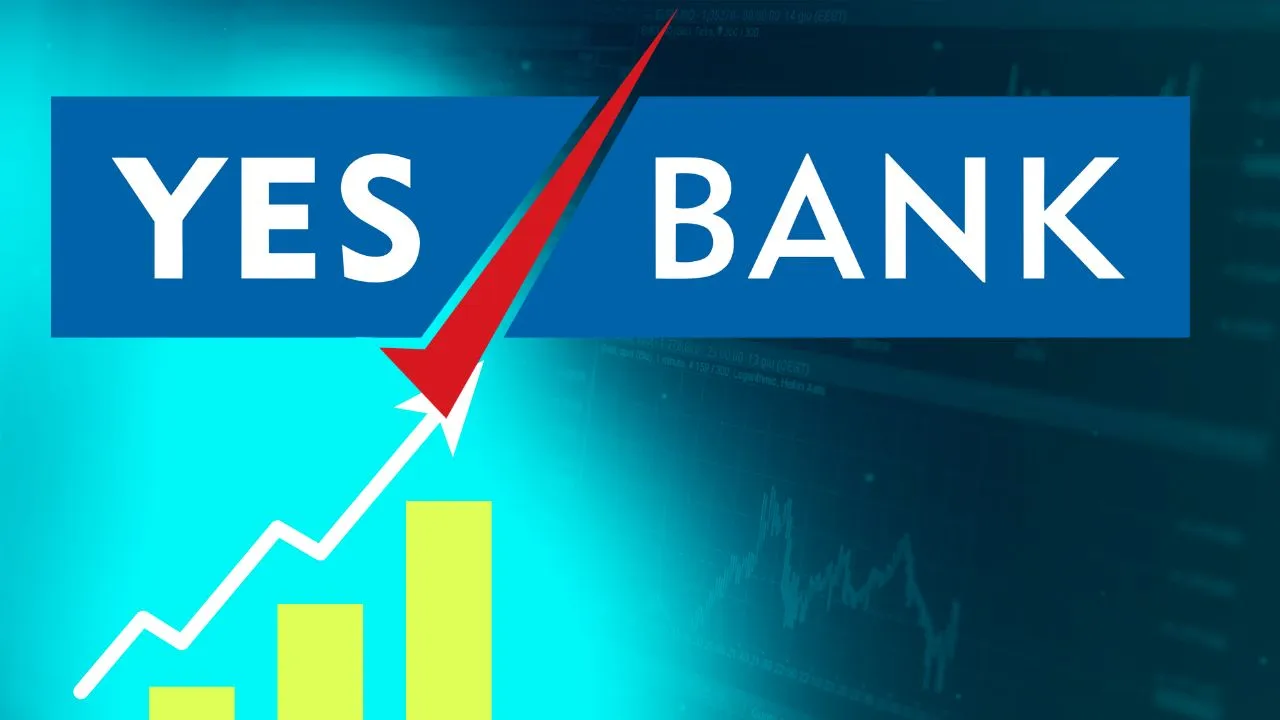

# **Project Summary -**

<ul>


**Data Wrangling** :-
<li>.Checking all features for presence of outliers.</li>

<li>Checking the null values present in data</li>
<li>.Convert the columns into proper datatype.</li>
<li>checking duplicate data .</li> 



**Exploratory Data Analysis** :-

<li>Plotting the dependent variable and distributions of dependent and independent variables.</li>

<li>Checking and visualizing the correlation between our dependent and independent variables.</li>

<li>Visualizing the relationship between each pair of our variables.</li>

**Data Preprocessing & Feature Engineering**:-

<li>Checking for and Dealing with multicollinearity present in our dataset.</li>

<li>Applying the log transform to deal with positively skewed data.</li>

<li>Scaling the data and splitting it into train and test sets. </li>

**Model Implementation** :-
<li>Fitting various models on our data and optimizing them via cross-validation.</li>

<li>Using these models to make predictions on test and train data.</li>

The Models implemented are :-

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Elastic Net Regression
5. Polynomial Regression
5. Random Forest
**Data Visualization**:-

<li>Using several kinds of charts like Line chart, scatter plot, heatmap, pair plot, distplot, boxplot etc 
to better visualize data and understand correlation and trends.</li>

**Model performance comparison**:-

<li>Comparison of all implemented models using various Regression evaluation metrics like  
Mean squared error, RMSE, R-squared and Adjusted R-squared.</li>
</ol>

# **GitHub Link -**

https://github.com/mohdraavi/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **Business Objective -**

The business objective of predicting the stock prices of Yes Bank is to help investors and traders make informed decisions about buying and selling the stock. By predicting the future stock price, investors can decide whether to buy, hold or sell the stock. This information is also useful for traders who are looking to make short-term investments in the stock. Accurate predictions can help investors and traders make profitable decisions, while inaccurate predictions can lead to financial losses. Therefore, the objective of predicting the Yes Bank stock price is to provide valuable insights to investors and traders that can help them make better investment decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#importing the required libraries
import numpy as np                      # numerical computations
import pandas as pd                     # data manipulations
import matplotlib.pyplot as plt         # visualize with plots
%matplotlib inline                     
import seaborn as sns                   # statistical data visualization
plt.style.use('seaborn-white')           # set plot style to seaborn white
from datetime import datetime           # to convert to date
import copy                             # create copies
import math                             # mathematical functions
from sklearn.pipeline import make_pipeline                            
from sklearn.preprocessing import (MinMaxScaler,  # scale the data
                                    StandardScaler,PolynomialFeatures)
from sklearn.model_selection import train_test_split  # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
                                     TimeSeriesSplit)
from sklearn.linear_model import LinearRegression     # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor    # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
                                  ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters
from sklearn.metrics import (r2_score,                # import required metrics
                             mean_squared_error,  mean_absolute_percentage_error, 
                             mean_absolute_error)
import warnings                                      # do not disturb mode
warnings.filterwarnings('ignore')

### Mount Drive

In [3]:
# Mounting google drive to load the data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

there are 185 rows and 5 columns

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
# getting descriptive statistics of the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df)-len(df.drop_duplicates())

0

so we can see there is no duplicate value  present in our data 

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

we can see there is no null value present in our data

<Axes: >

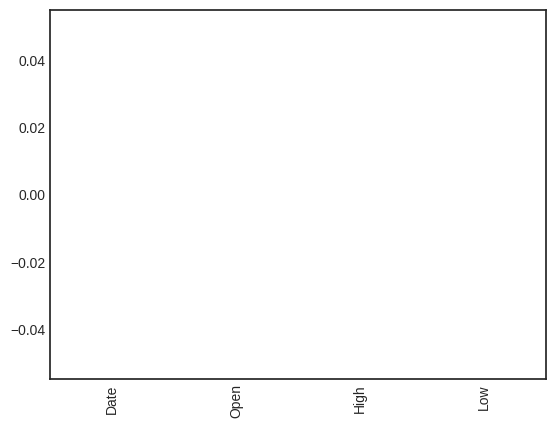

In [11]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending=False)[:4].plot.bar()

### What did you know about your dataset?

we have seen 185 rows and 5 columns and no duplicate and null value present in our data .
We have a dataset containing values of Yes bank monthly stock prices as mentioned in our problem statement. 

Explaining the features present :-


*  **Date :-** The date (Month and Year provided)
*  **Open :-** The price of the stock at the beginning of a particular time period.
*  **High :-**The Peak(Maximum) price at which a stock traded during the period.
*  **Low :-**The Lowest price at which a stock traded during the period.
*  **Close :-** The trading price at the end (in this case end of the month).

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Let us now preserve the original data before we operate on it.
df1 = df.copy()

In [13]:
#checking for duplicates
df[df.duplicated()==True]

,Date,Open,High,Low,Close


In [14]:
#checking the datatype of each feature
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

we can see Date column has datatype  object so we need to convert this into date datatype

In [15]:
df['Date'].iloc[:10]

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
5    Dec-05
6    Jan-06
7    Feb-06
8    Mar-06
9    Apr-06
Name: Date, dtype: object

In [16]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y')))

In [17]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


Since we are trying to track variation in stock price on different dates, it makes sense to set this column as index.

In [18]:
df.set_index('Date',inplace=True) # setting Date column as index.

In [19]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [20]:
#Seprating the dependent and independent variables
independent_variables = df.columns.tolist()[:-1]
dependent_variables = ['Close']

print(independent_variables)
print(dependent_variables)

['Open', 'High', 'Low']
['Close']


**Checking all features for presence of outliers.**

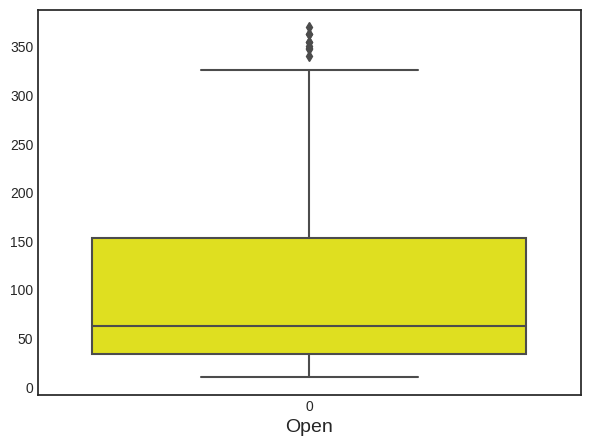

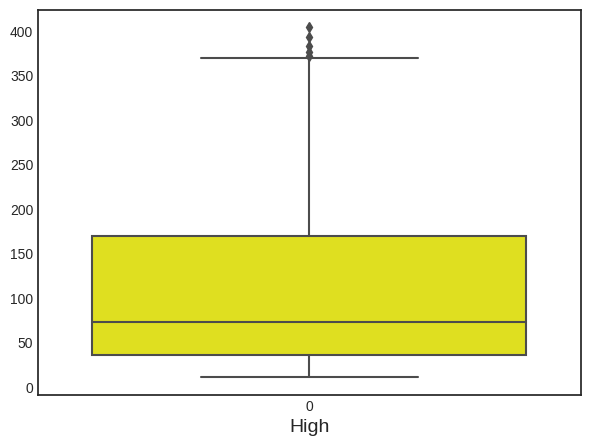

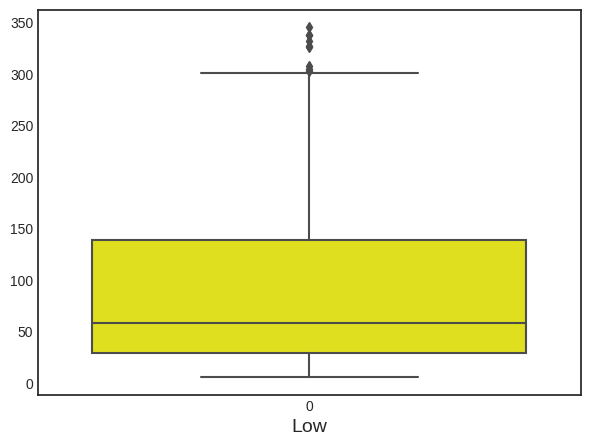

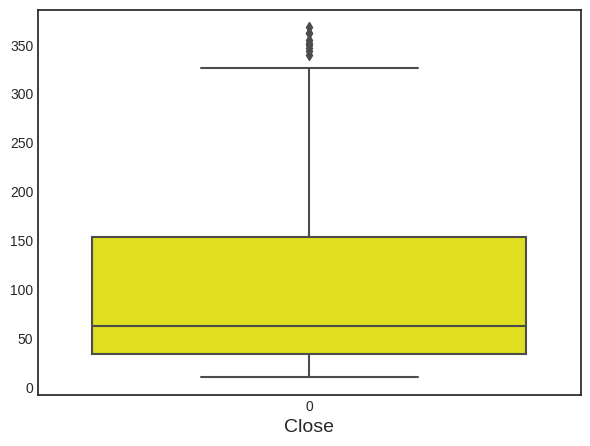

In [21]:
for col in df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(df[col],color='yellow')
  plt.xlabel(col,fontsize=14)
  plt.show()

As we can see there are some outliers present in our data. We need to deal with these before proceeding to modelling.

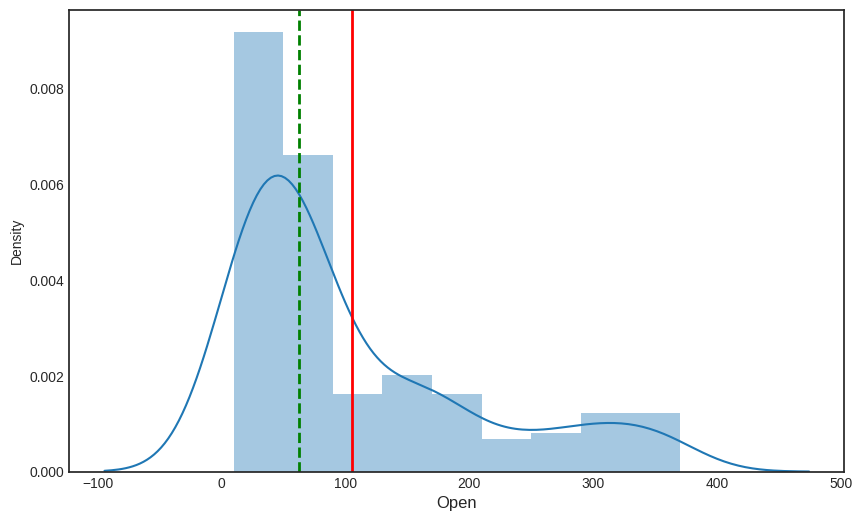

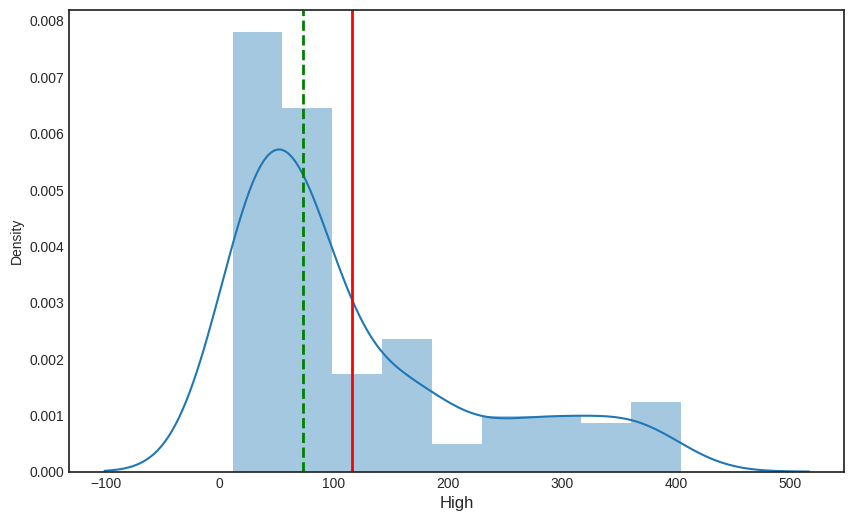

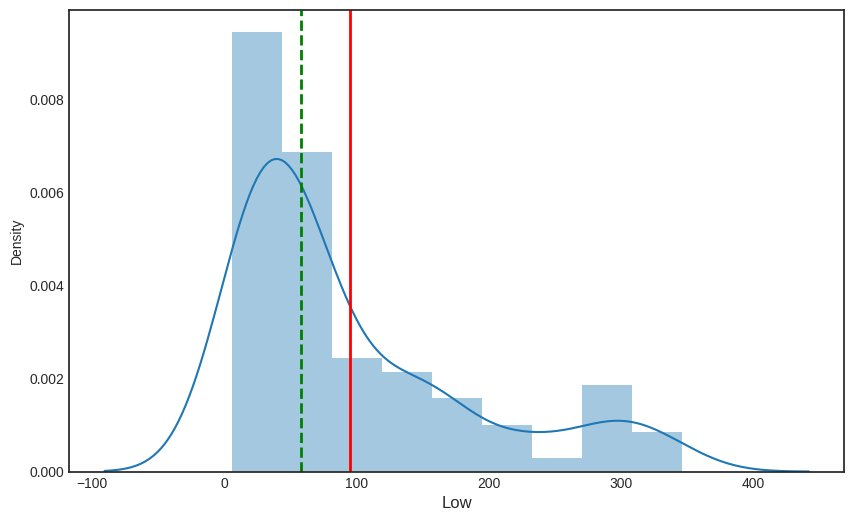

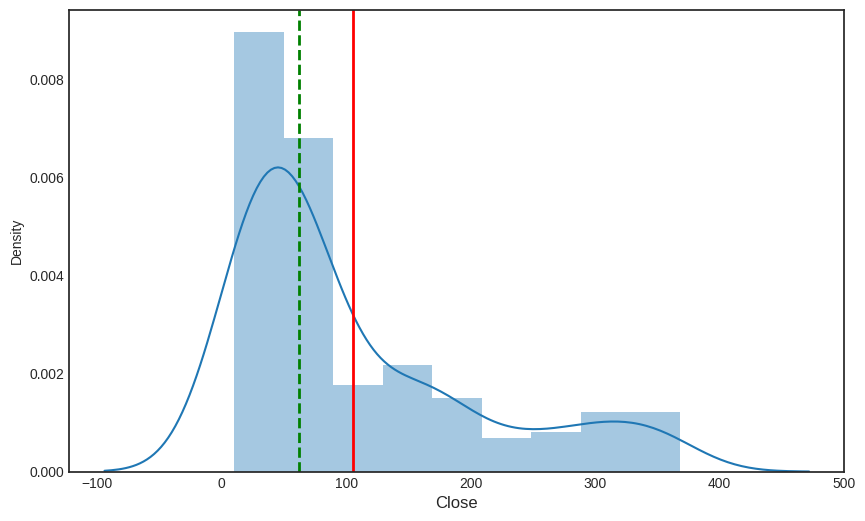

In [22]:
#plotting the distribution of all features.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.xlabel(col,fontsize=12)

  plt.axvline(df[col].mean(),linewidth='2',color='red')
  plt.axvline(df[col].median(),linewidth='2',color='green',linestyle='dashed')

We can clearly see that *these distributions are positively skewed*. The mean and median are at significant distance from each other.

So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

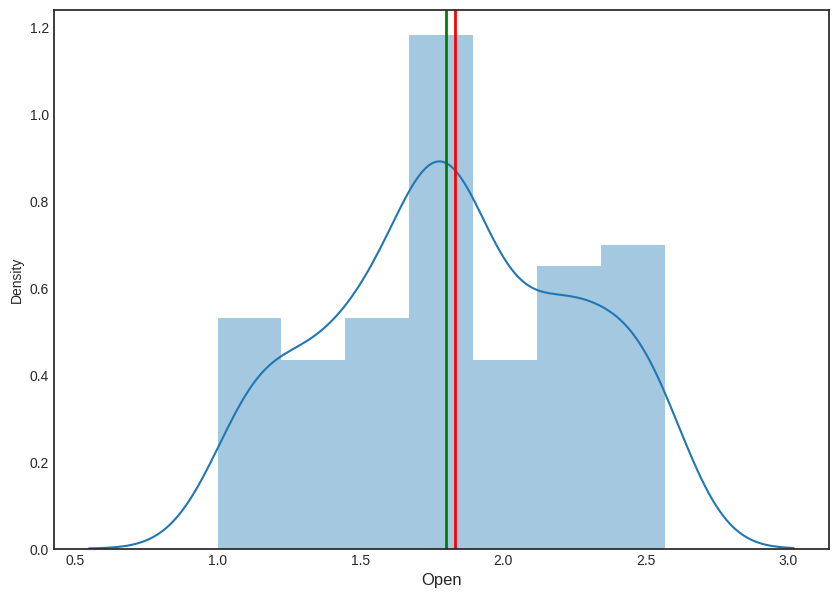

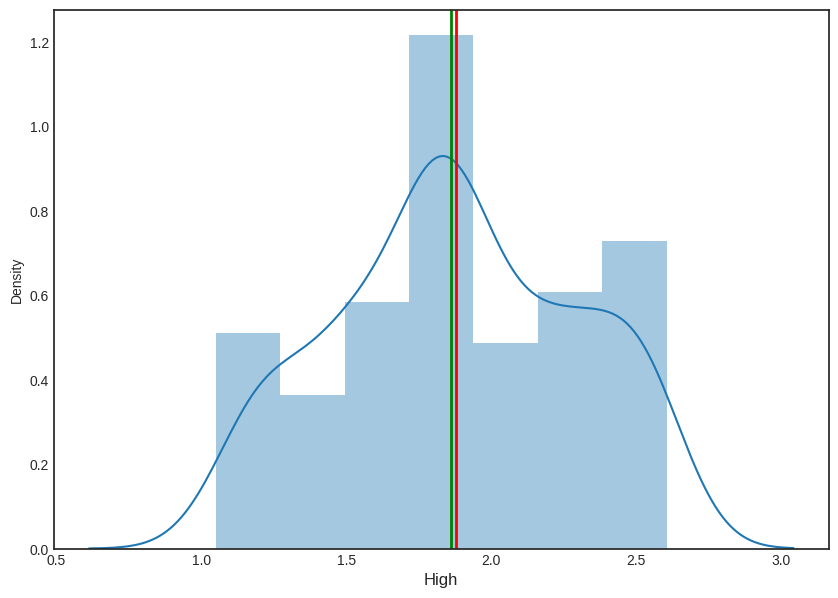

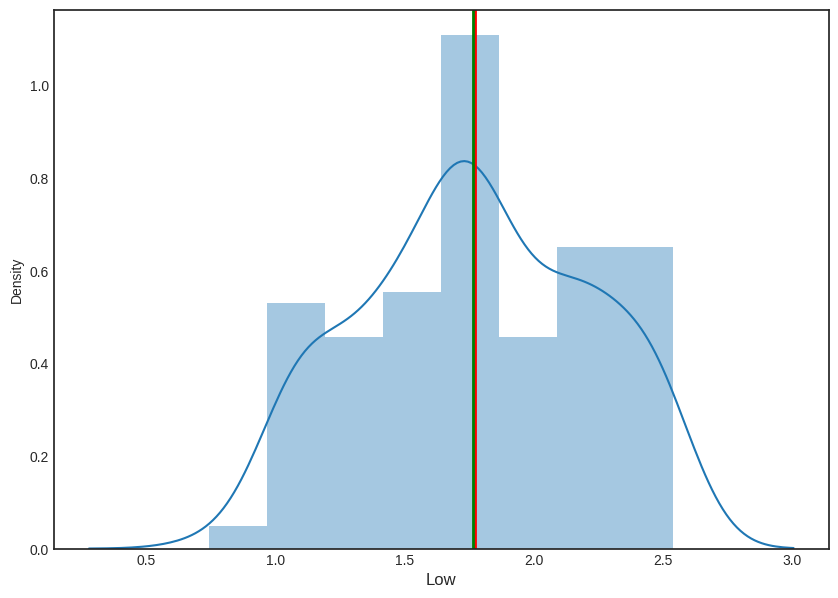

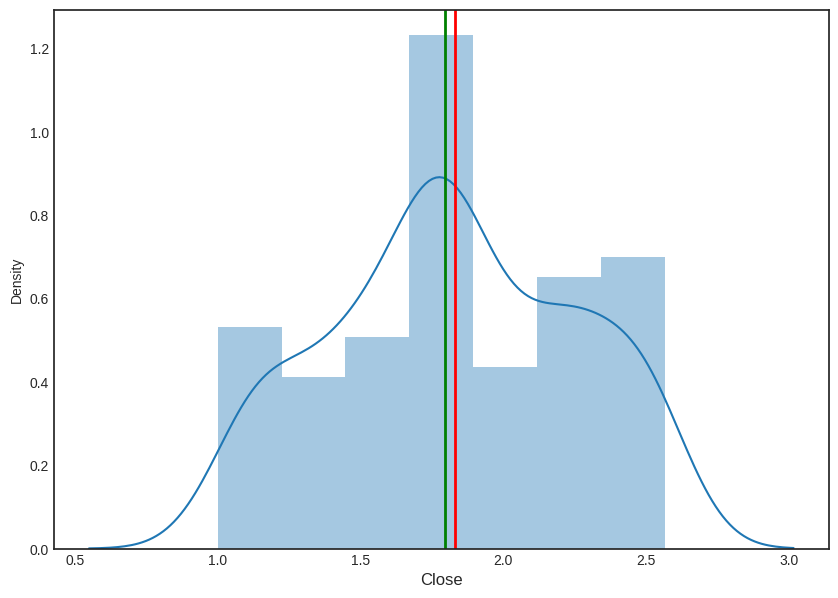

In [23]:
for col in df.columns:
  plt.figure(figsize=(10,7))
  sns.distplot(np.log10(df[col]))
  plt.xlabel(col,fontsize=12)


  plt.axvline(np.log10(df[col]).mean(),color='red',linewidth=2)
  plt.axvline(np.log10(df[col]).median(),color='green',linewidth=2)

Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.



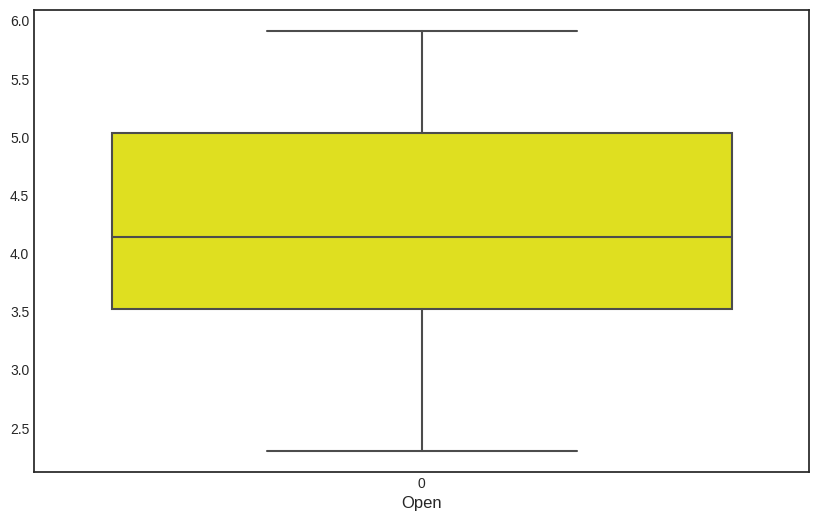

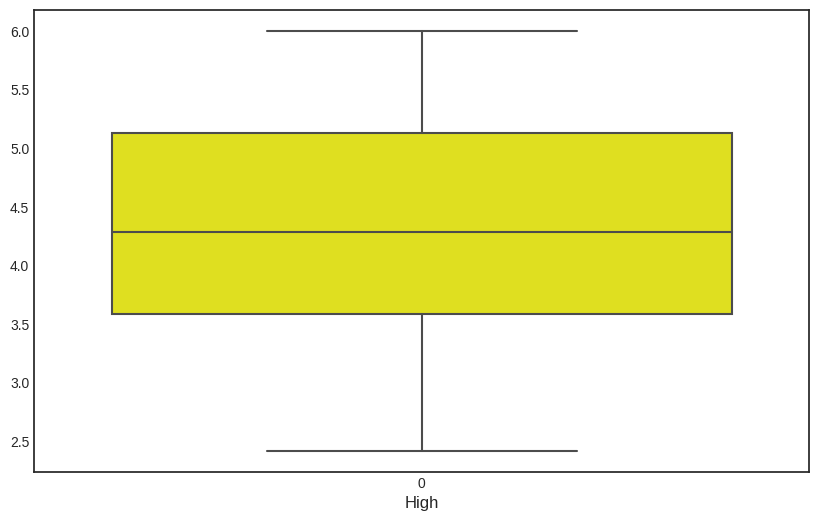

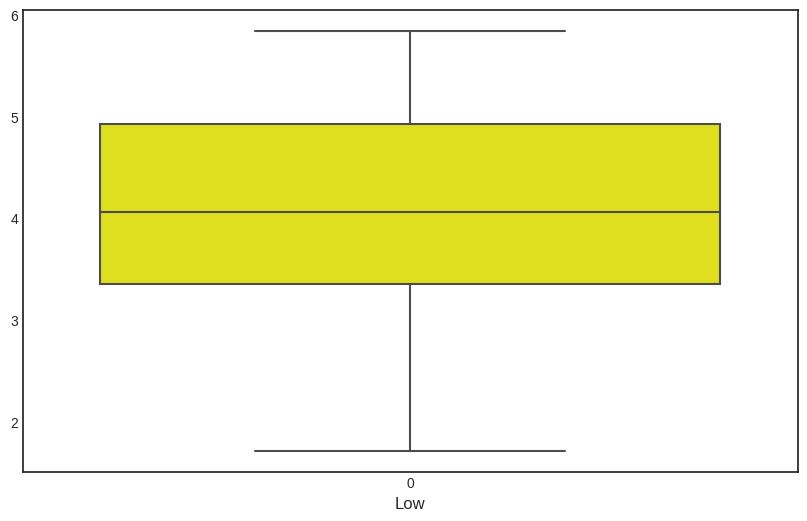

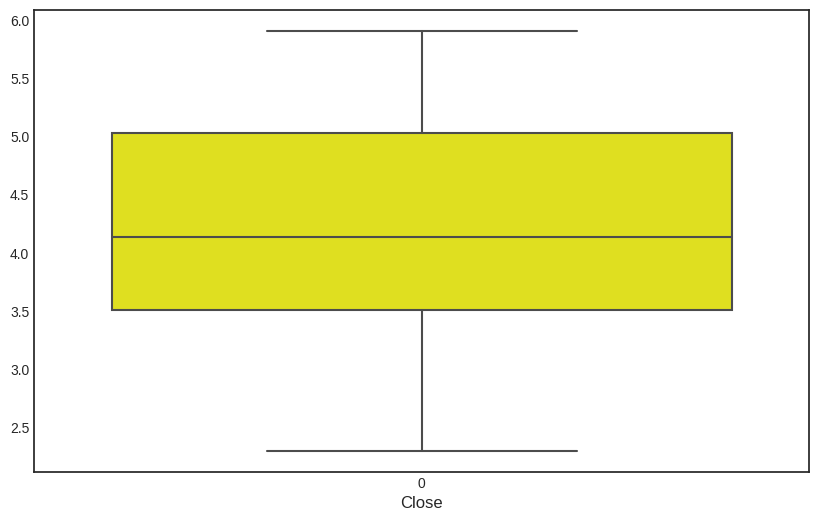

In [24]:
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(np.log(df[col]),color='yellow')
  plt.xlabel(col,fontsize=12)

Now, we have no outliers anymore. Log transformation diminishes the outlier's effect.

Since we have a very small dataset to work with, dropping the outliers completely is not a good idea. So this is how we are going to leave them

### What all manipulations have you done and insights you found?


As we have seen we didn't need to null analysis because our dataset doesn't have any null value and duplicate value as well.

1.we did copy of our data  to preserve original data.

2.converted to  date variable from object datatype to date datatype.

3.set date columns as index to track variation in stock price

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

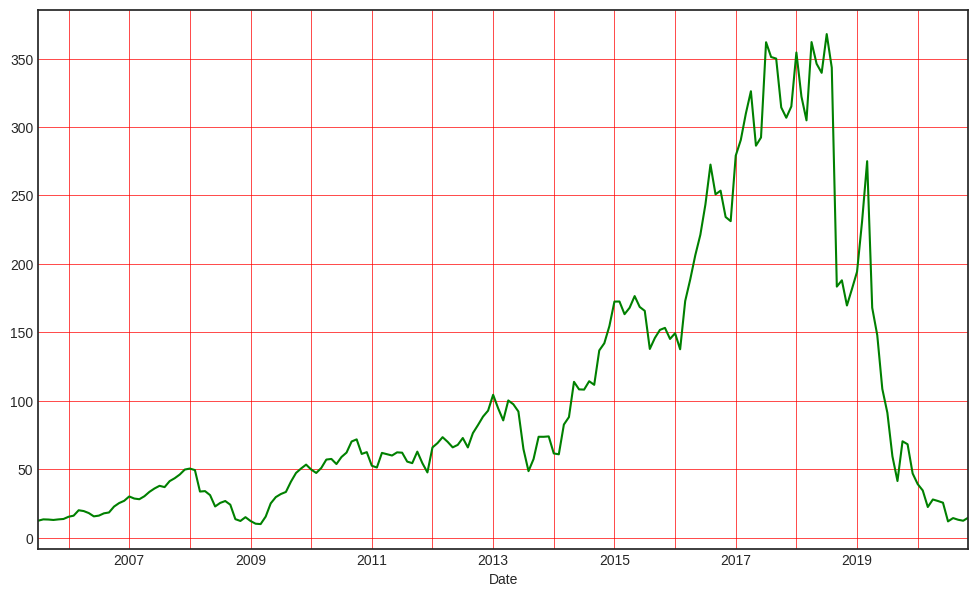

In [25]:
#plotting target variable
plt.figure(figsize=(12,7))
df['Close'].plot(color='green')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='red')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='red')

##### 1. Why did you pick the specific chart?

In order to see rising up and down of stock price from 2005-07-01 to 2020-11-01
because this data is from 2005-07-01 to 2020-11-01

##### 2. What is/are the insight(s) found from the chart?

We can see that the stock price is rising up until 2018 when the fraud case involving Rana Kapoor happened after which the stock price has had a sharp decline

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes it will help nvestors or shareholders. 

#### Chart - 2

Answer Here

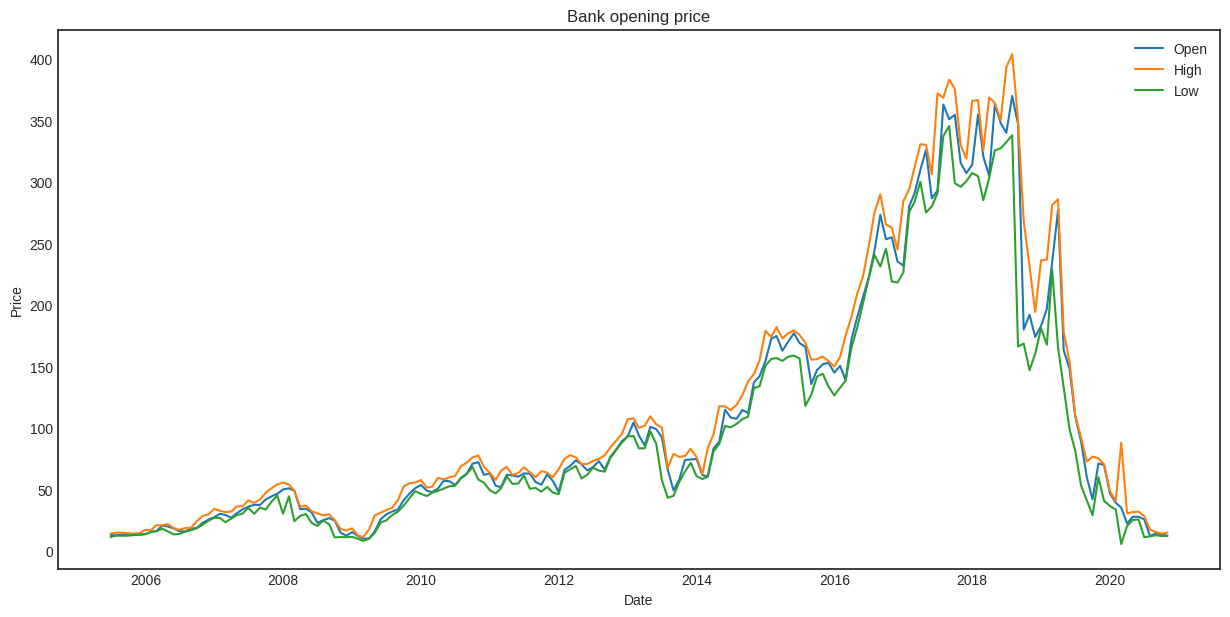

In [26]:

plt.figure(figsize=(15,7))
plt.plot(df['Open'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['Open',"High",'Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bank opening price')
plt.show()

#### Chart - 3

**Correlation between each independent variable using scatter plot**

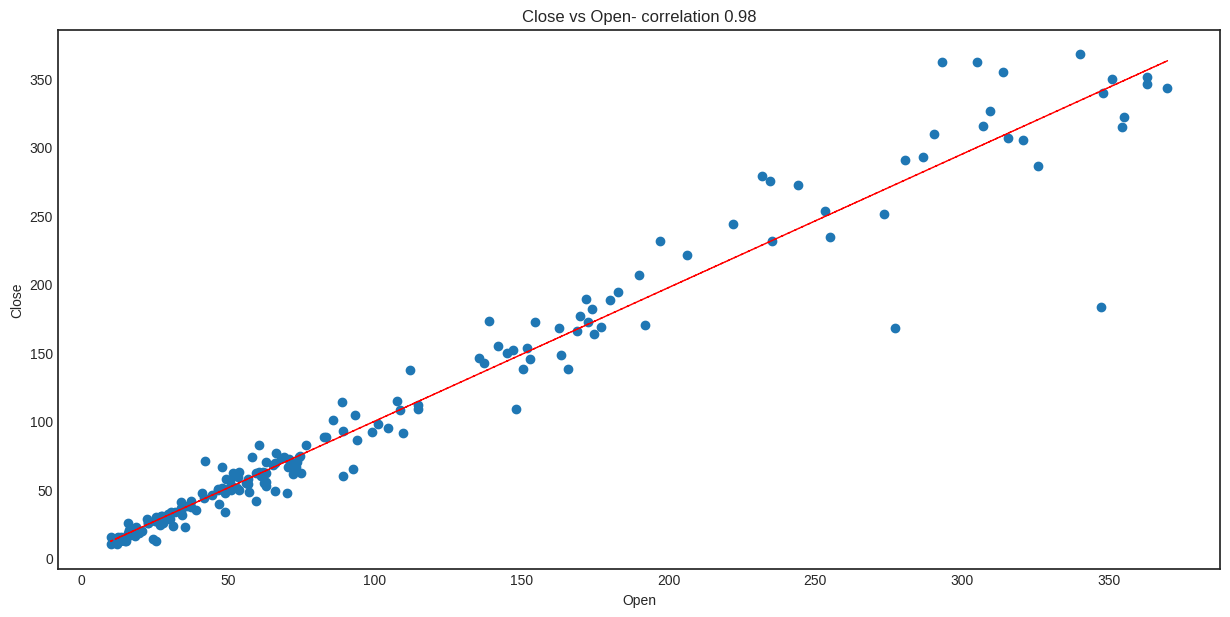

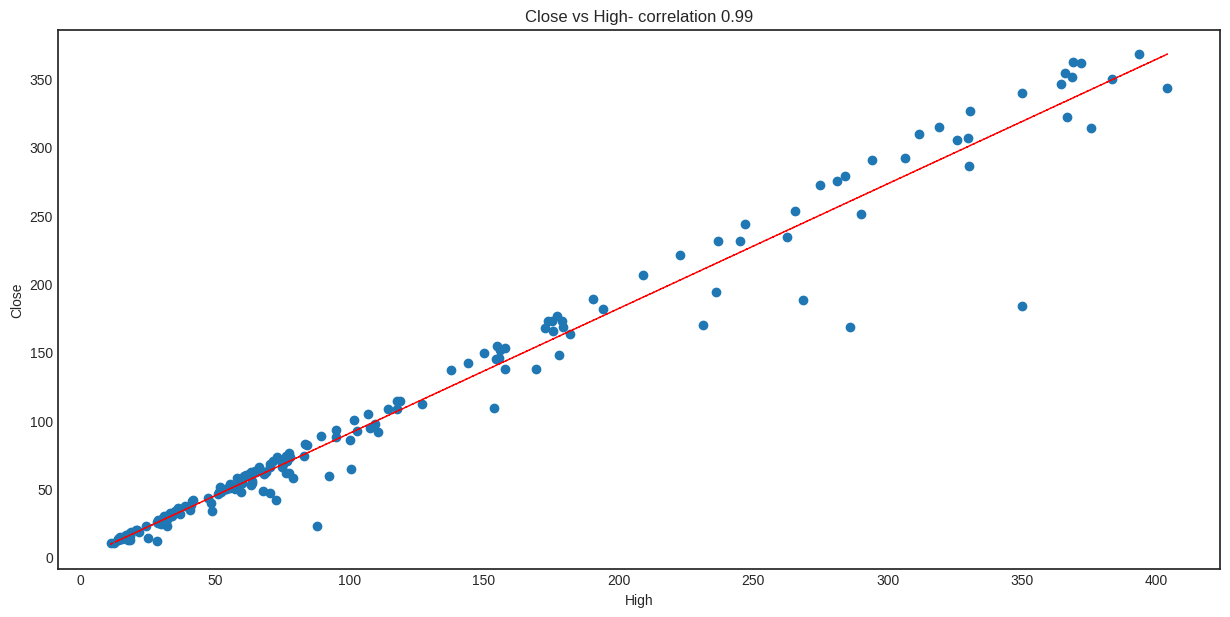

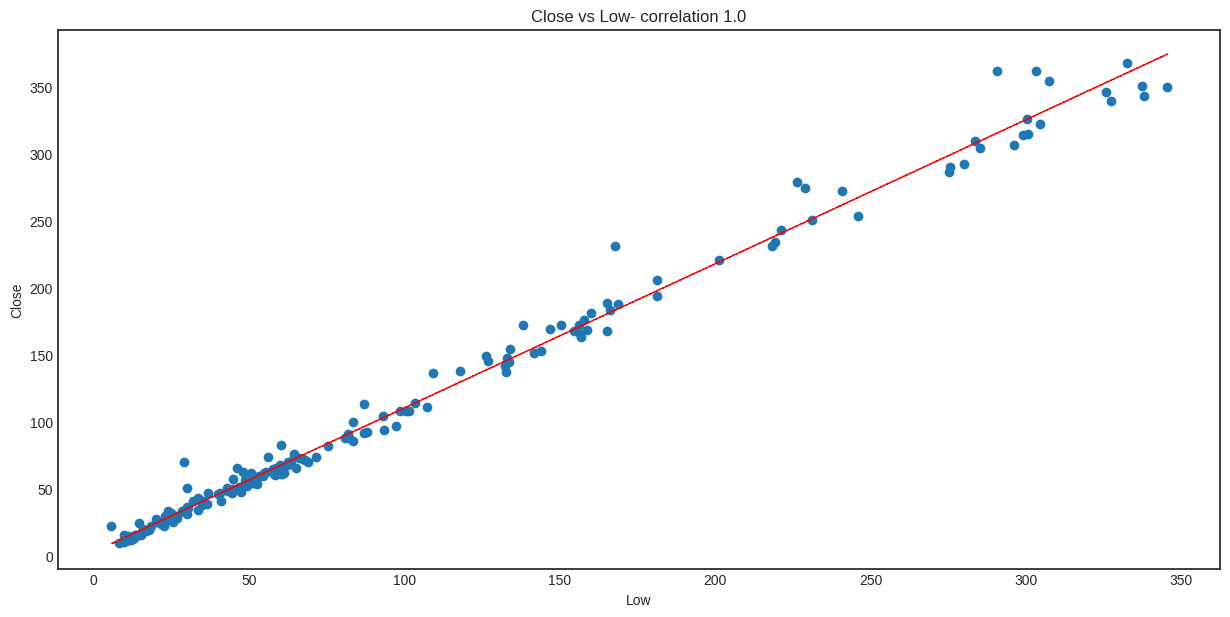

In [27]:
for col in df.columns[:-1]:
  fig =plt.figure(figsize=(15,7))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)

  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation ' + str(round(correlation,2)))
  z = np.polyfit(df[col],label,1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)

##### 1. Why did you pick the specific chart?

To check correlation of each independent variable with target(dependent) variable.

##### 2. What is/are the insight(s) found from the chart?

We can see that all of our independent variables are highly correlated to the dependent variable

#### Chart - 4

**Correlation Heatmap**

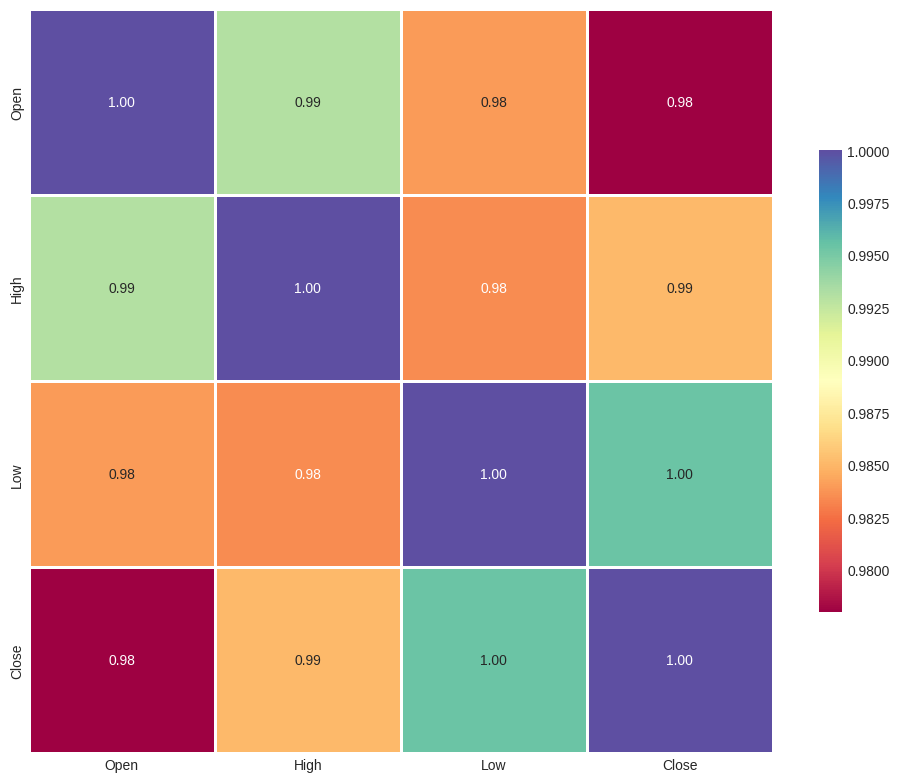

In [28]:
#Correlation heatmap between each variables
plt.figure(figsize=(12,10))   
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

##### 1. Why did you pick the specific chart?

To check correlation between each variable ?

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent variables should ideally not have high correlation with one another.

**Pair Plot**

#### Chart - 5

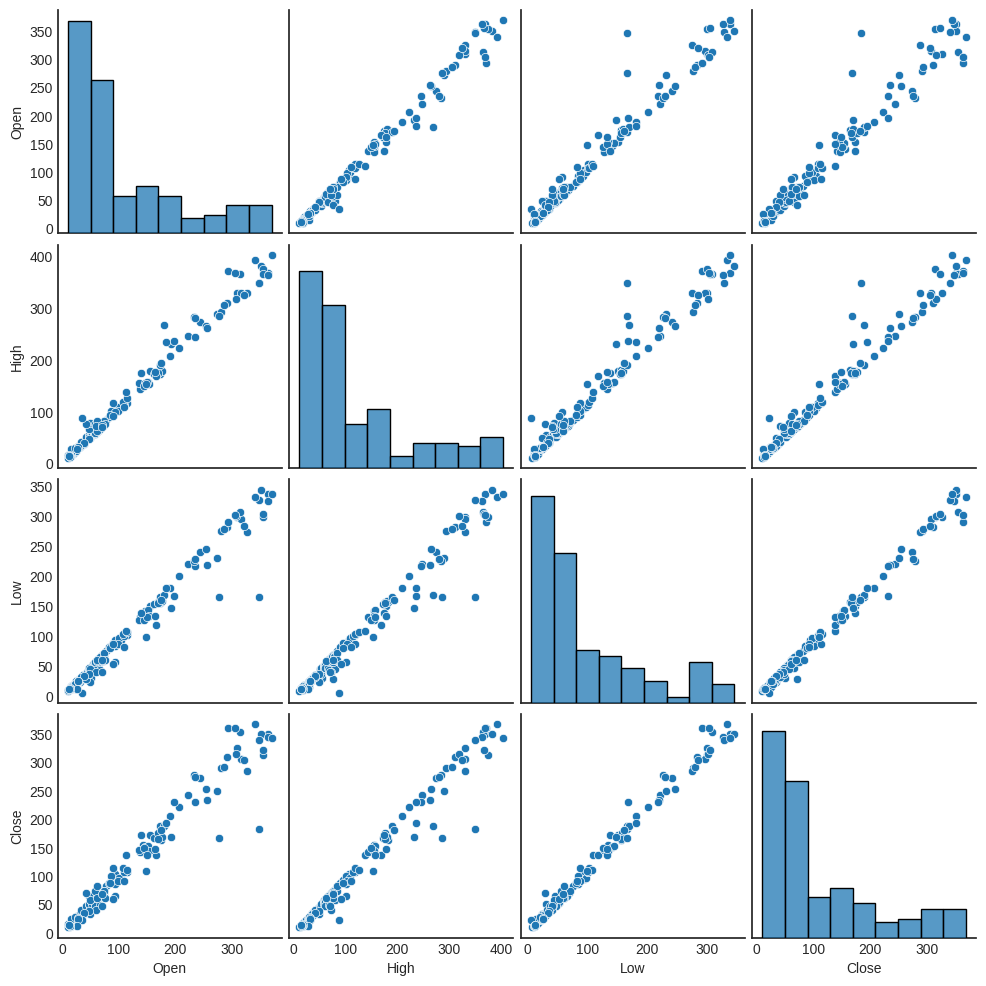

In [29]:
sns.pairplot(df)

## ***5. Feature Engineering & Data Pre-processing***

###1.Multicolinearity

In [30]:
#Dealing with multiconlinearity using VIF analysis.
#Calculating VIF to see correltion 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
  return (vif)

In [31]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

### 2. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
#we have seen our data does not have any missing value

### 3. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments
# we have seen earlier our dataset is small so we couldn't remove outlier because it will lead to loss of information

### 4. Data Transformation

In [34]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(df[independent_variables]).values

y = np.log10(df[dependent_variables]).values

### 5. Data Splitting

In [35]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split( x , y , test_size = 0.3, random_state = 42)

##### What data splitting ratio have you used and why? 

We took 30% for testing and 70% for training 

In [36]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [37]:
x_test.shape

(56, 3)

##### Which method have you used to scale you data and why?

we used standardizaiotn to scale the data so as to avoid giving more importance to features with large values. In stadardization mean becomes zero and standard deviation is 1.

## ***6. ML Model Implementation***

In [38]:
# Creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [39]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

  # training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  print('Evaluation Matrix')

  # finding mean_squared_error
  MSE  = mean_squared_error(10**y_test,10**pred)
  print("MSE :" , MSE)

  # finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  # finding the r2 score
  r2 = r2_score(10**y_test,10**pred)
  print("R2 :" ,r2)

  # finding the adjusted r2 score
  adj_r2=1-(1-r2_score(10**y_test,10**pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  # appending metric to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # plotting the line graph of actual and predicted values
  print('Evaluation Graph')  
  plt.figure(figsize=(12,8))
  plt.plot((10**pred)[:100])
  plt.plot((np.array(10**y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [40]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
 
    print('Evaluation Matrix')
    MSE  = mean_squared_error(10**y_test,10**preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    r2 = r2_score(10**y_test,10**preds)
    print("R2 :" ,r2)
    
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = model.predict(X_train)

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('Evaluation Graph') 
    plt.figure(figsize=(12,8))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 8})
    plt.show()

#**Linear Regression**

In [41]:
# ML Model - 1 Implementation
Linear_model = LinearRegression()

Evaluation Matrix
MSE : 123.7741921681018
RMSE : 11.125385034600008
R2 : 0.9857501448111582
Adjusted R2 :  0.9849280377810327
Evaluation Graph


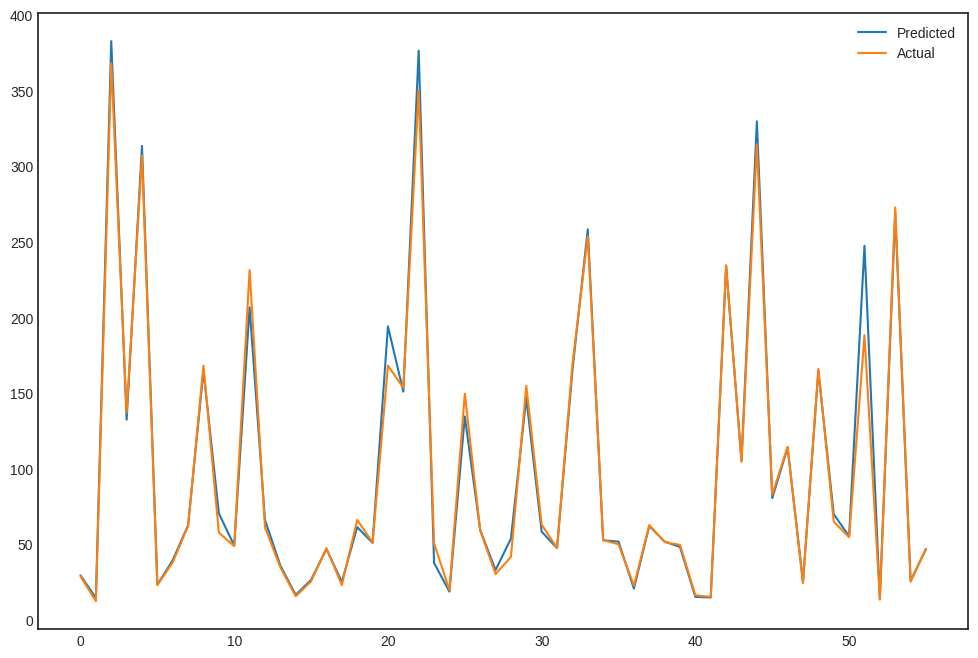

In [42]:
train_linear_model(Linear_model, X_train, Y_train, X_test, Y_test)

#**Lasso Regression with cross validated regularization**

In [43]:
# finding the best parameters for lasso by gridsearchcv

lasso_model = Lasso()

# setting the parameters of the lasso model

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

Evaluation Matrix
MSE : 123.7624369548706
RMSE : 11.124856716150127
R2 : 0.9857514981634469
Adjusted R2 :  0.9849294692113381
Evaluation Graph


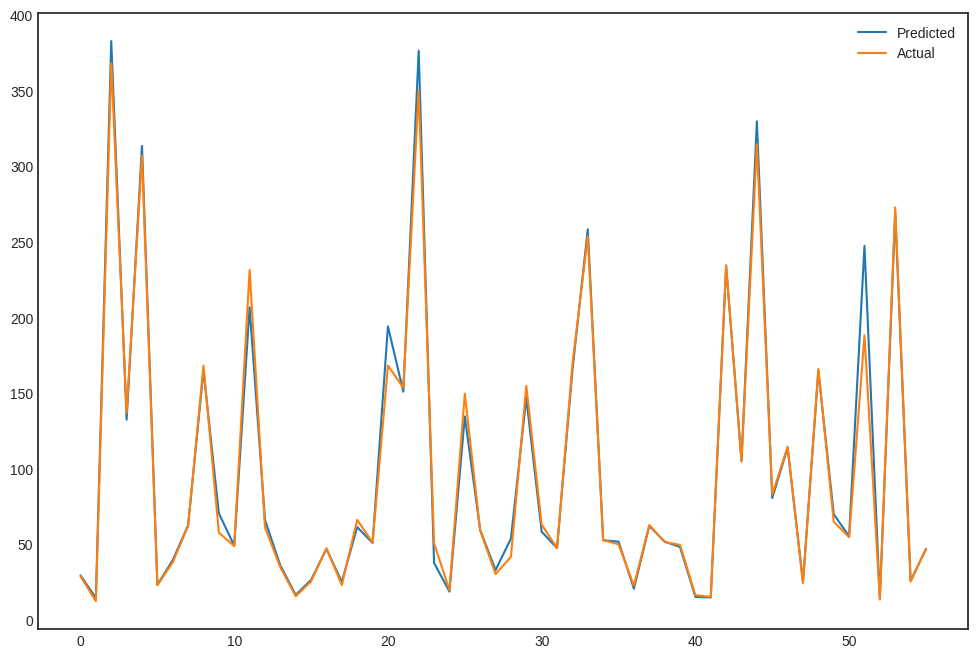

In [44]:
train_linear_model(lasso_grid, X_train, Y_train, X_test, Y_test)

#**Ridge Regression with cross validated regularization**

In [45]:
# initialize a Ridge model
ridge = Ridge()

# define a dictionary of hyperparameters to search over using GridSearchCV
parameters = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]
}
# initialize a GridSearchCV object with the Ridge model, hyperparameters, 
# negative mean squared error scoring metric, and 5-fold cross-validation
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

Evaluation Matrix
MSE : 123.7741921681018
RMSE : 11.125385034600008
R2 : 0.9857501448111582
Adjusted R2 :  0.9849280377810327
Evaluation Graph


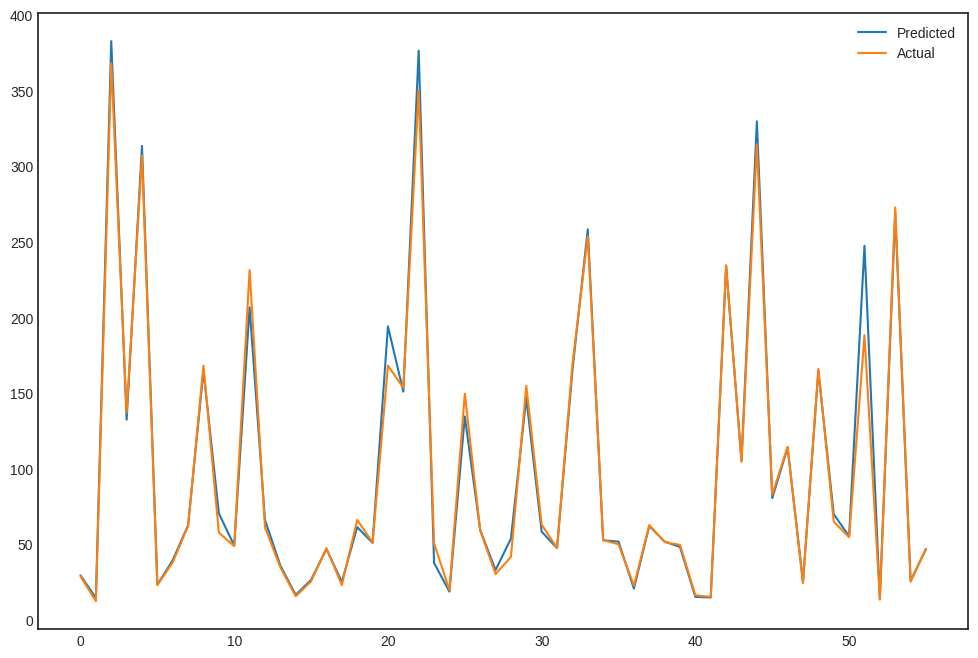

In [46]:
train_linear_model(Linear_model, X_train, Y_train, X_test, Y_test)

#Elastic Net Regression

In [47]:
# Initializing the ElasticNet object
elastic = ElasticNet()

# Defining a dictionary of hyperparameters to be tuned using GridSearchCV
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100], 
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# Creating an ElasticNet regression object with GridSearchCV to find best hyperparameters
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)

Evaluation Matrix
MSE : 123.7624369548998
RMSE : 11.12485671615144
R2 : 0.9857514981634435
Adjusted R2 :  0.9849294692113345
Evaluation Graph


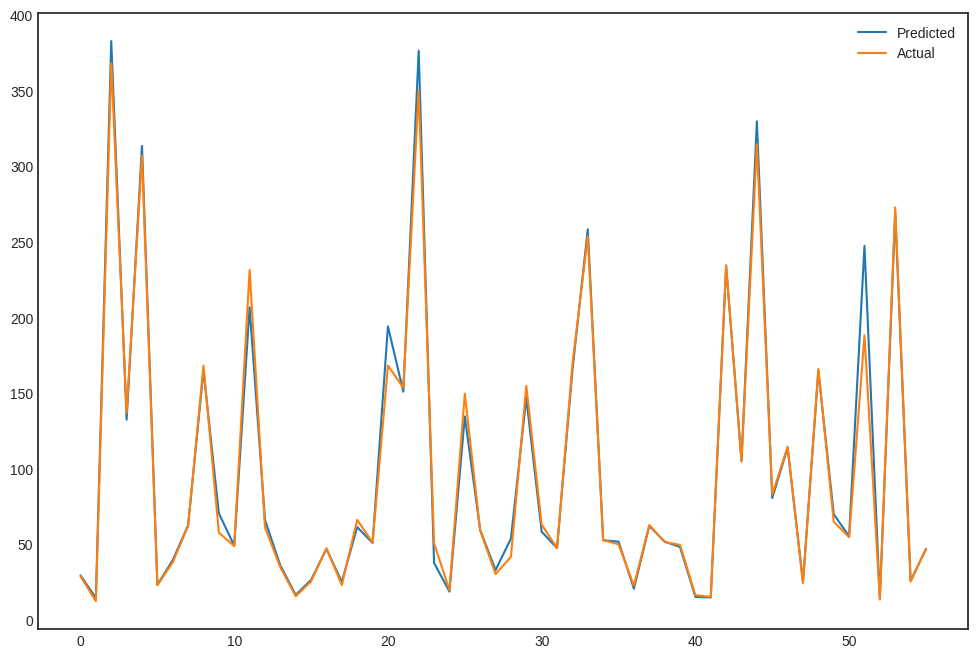

In [48]:
train_linear_model(elastic_grid, X_train, Y_train, X_test, Y_test)

##**Polynomial Regression**


In [49]:
# Create a pipeline with PolynomialFeatures and LinearRegression
# PolynomialFeatures with degree=2 will create a new feature matrix consisting of all polynomial combinations 
# LinearRegression will then be applied to the transformed data
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

Evaluation Matrix
MSE : 209.31607448617092
RMSE : 14.467759829571783
R2 : 0.9759018928107902
Adjusted R2 :  0.9745116173960281
Evaluation Graph


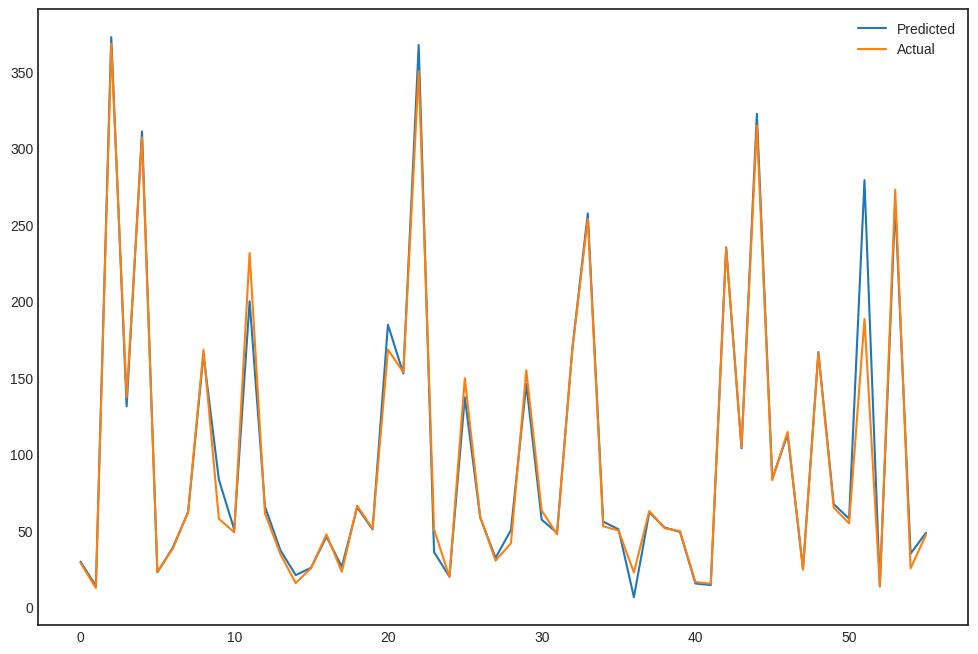

In [50]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,Y_train,X_test,Y_test)

#**Random Forest**

In [51]:
# creating model of random forest
rf_model = RandomForestRegressor()

In [52]:
# creating param dict to check random forest with different value of parameter through gridsearch
n_estimators=[100,150,200]
max_depth=[15,20]
max_leaf_nodes=[50,60,70]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [53]:
# creating rf_grid model to run rf model with gridsearch.
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

Evaluation Matrix
MSE : 136.14173604623903
RMSE : 11.667979090066927
R2 : 0.9843262962186684
Adjusted R2 :  0.9643795956306355
Evaluation Graph


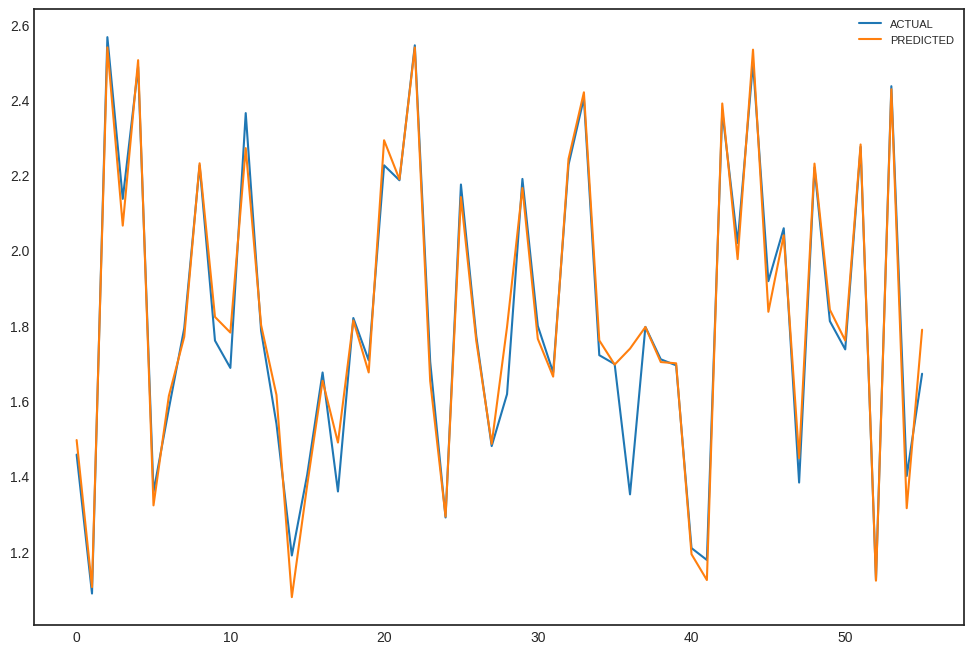

In [54]:
# calling run_model to train,fit and evalution of decision tree model.
run_model(rf_grid,X_train,Y_train,X_test,Y_test)

In [55]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [56]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Random_Forest']

In [57]:
#converting dictionary to dataframe for easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [59]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [60]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,123.774192,11.125385,0.985750,0.984928
1,Lasso,123.762437,11.124857,0.985751,0.984929
2,Ridge,123.774192,11.125385,0.985750,0.984928
3,Elasticnet,123.762437,11.124857,0.985751,0.984929
4,Polynomial,209.316074,14.467760,0.975902,0.974512
5,Random_Forest,136.141736,11.667979,0.984326,0.964380


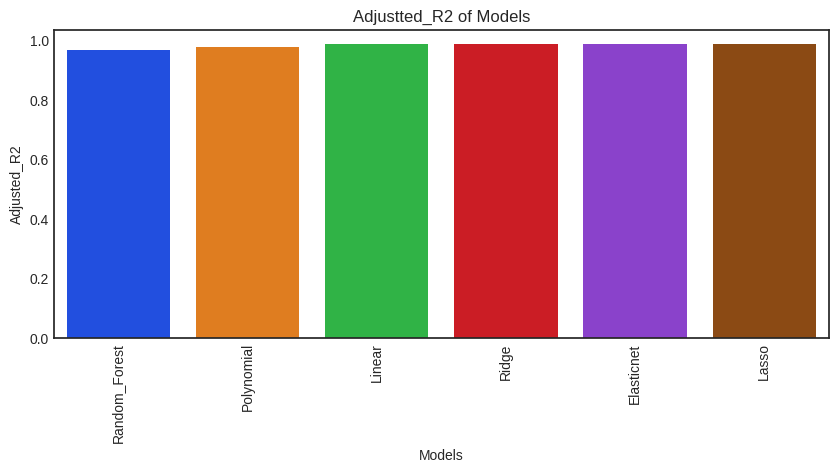

In [61]:
#creating bar plot to visualize the Adjusted R2 of model. 
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="bright").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Adjusted R2 score will be the best evalaution metric to select the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The top-performing models in terms of mean squred error, Root mean squred error, R2, and Adjested R2 are Lasso and Elasticnet with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.


# **Conclusion**

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and *Lasso regressor is the best performing model with Adjusted R2 score value of 0.9849* and scores well on all evaluation metrics.** 
*   **All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 96%.**
*   **With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.** 


---


---















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***